In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress


In [2]:
data = pd.read_csv('CSVs/census_walkscore_by_zip.csv')
data['Zipcode'] = data['Zipcode'].astype('object')
data_walk_sorted = data.sort_values('Walk Score', ascending=False)
data_walk_sorted['Walk Score'] = round(data_walk_sorted['Walk Score'], 2)
data_walk_sorted['Income Change'] = data_walk_sorted['Median Income 2018'] - data_walk_sorted['Median Income 2012']
data_walk_sorted['Non-White Change'] = data_walk_sorted['% Non-White 2018'] - data_walk_sorted['% Non-White 2012']
data_walk_sorted['Population Change'] = data_walk_sorted['Population 2018'] - data_walk_sorted['Population 2012']
data_walk_sorted['Black Population Change'] = data_walk_sorted['Black Population 2018'] - data_walk_sorted['Black Population 2012']

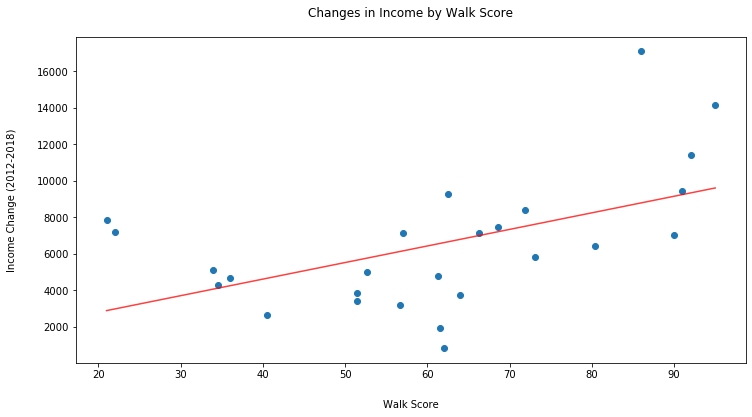

r=0.52


In [3]:
plt.figure(figsize=(12,6))
plt.scatter(data_walk_sorted['Walk Score'], data_walk_sorted['Income Change'])
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Income Change (2012-2018)', labelpad=20)
plt.title('Changes in Income by Walk Score', pad=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_walk_sorted['Walk Score'], data_walk_sorted['Income Change'])
regress_values = data_walk_sorted['Walk Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(data_walk_sorted['Walk Score'], regress_values, "r-", alpha=.75)

plt.show()
print(f"r={round(rvalue, 2)}")

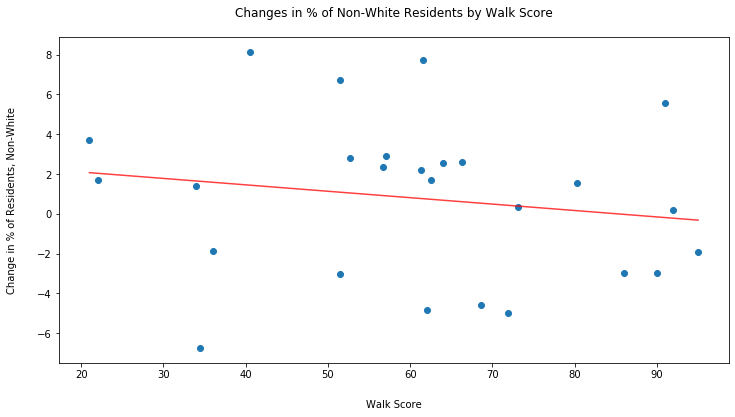

r=-0.17


In [4]:
plt.figure(figsize=(12,6))
plt.scatter(data_walk_sorted['Walk Score'], data_walk_sorted['Non-White Change'])
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Change in % of Residents, Non-White', labelpad=20)
plt.title('Changes in % of Non-White Residents by Walk Score', pad=20)


(slope, intercept, rvalue, pvalue, stderr) = linregress(data_walk_sorted['Walk Score'], data_walk_sorted['Non-White Change'])
regress_values = data_walk_sorted['Walk Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(data_walk_sorted['Walk Score'], regress_values, "r-", alpha=.75)

plt.show()
print(f"r={round(rvalue, 2)}")

plt.show()

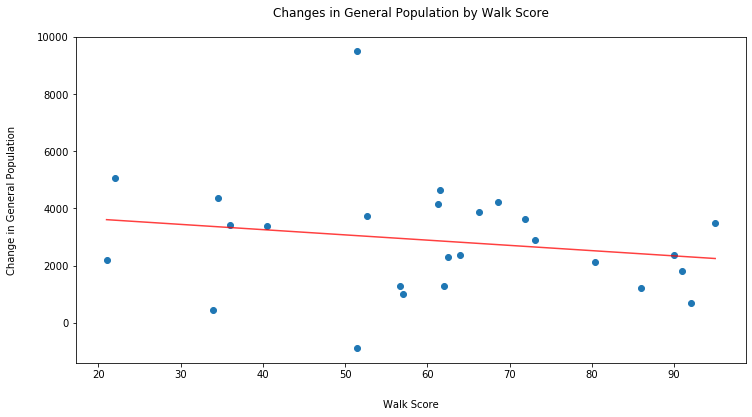

r=-0.19


In [5]:
plt.figure(figsize=(12,6))
plt.scatter(data_walk_sorted['Walk Score'], data_walk_sorted['Population Change'])
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Change in General Population', labelpad=20)
plt.title('Changes in General Population by Walk Score', pad=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_walk_sorted['Walk Score'], data_walk_sorted['Population Change'])
regress_values = data_walk_sorted['Walk Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(data_walk_sorted['Walk Score'], regress_values, "r-", alpha=.75)

plt.show()
print(f"r={round(rvalue, 2)}")

plt.show()

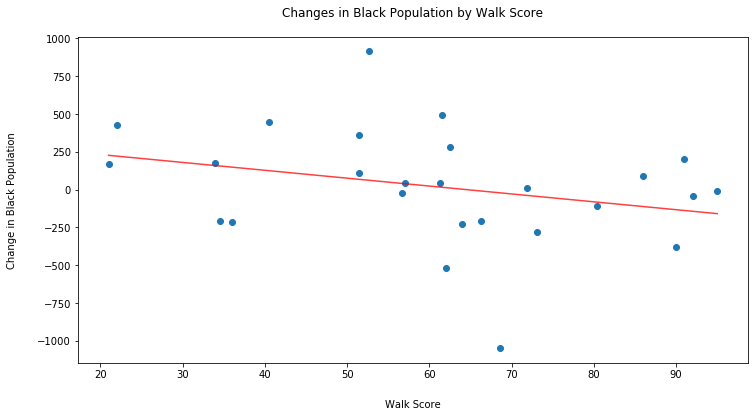

r=-0.29


In [6]:
plt.figure(figsize=(12,6))
plt.scatter(data_walk_sorted['Walk Score'], data_walk_sorted['Black Population Change'])
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Change in Black Population', labelpad=20)
plt.title('Changes in Black Population by Walk Score', pad=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_walk_sorted['Walk Score'], data_walk_sorted['Black Population Change'])
regress_values = data_walk_sorted['Walk Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(data_walk_sorted['Walk Score'], regress_values, "r-", alpha=.75)

plt.show()
print(f"r={round(rvalue, 2)}")

plt.show()